# Quickstart

In [1]:
#<!-- hide -->
import sys
sys.path.append('../')
#<!-- end_hide -->

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from boxjenkins.boxjenkins import autoARIMA

In [3]:
df = pd.read_csv('https://datasets-nixtla.s3.amazonaws.com/air-passengers.csv')
df.head()

,unique_id,ds,y
0,AirPassengers,1949-01-01,112
1,AirPassengers,1949-02-01,118
2,AirPassengers,1949-03-01,132
3,AirPassengers,1949-04-01,129
4,AirPassengers,1949-05-01,121


In [4]:
model = autoARIMA()
model_fit = model.fit(df['y'])
print(model_fit.params)

{'boxcox_lambda': 0.1802567849847353, 'c': 0, 'p': 12, 'd': 1, 'q': 0}


In [16]:
model_fit.forecast(10)

{'mean_forecast': array([444.25185389, 414.65617096, 439.29292227, 477.80818098,
        496.03276244, 556.858998  , 640.13299933, 614.63925348,
        526.91066141, 476.20529218]),
 'upper_forecast': array([478.40425352, 460.66847198, 497.32817242, 548.2305694 ,
        575.31029059, 650.58299576, 751.26737413, 727.36396422,
        629.76104003, 574.07829861]),
 'lower_forecast': array([412.12429262, 372.48100674, 386.92999042, 414.97931524,
        425.94180172, 474.50267772, 542.85008241, 516.65343005,
        438.25440623, 392.45200921])}

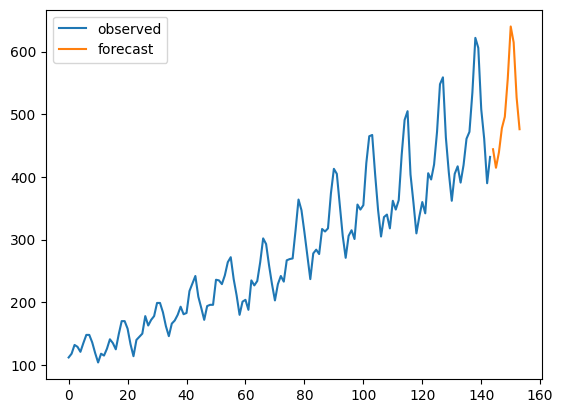

In [8]:
df_plot_forecast = pd.DataFrame({'forecast':model_fit.forecast(10)['mean_forecast']})
df_plot = pd.DataFrame({'observed':df['y'].dropna()})
df_plot = pd.concat([df_plot,df_plot_forecast])
df_plot.reset_index(drop=True,inplace=True)

df_plot.plot()
plt.show()

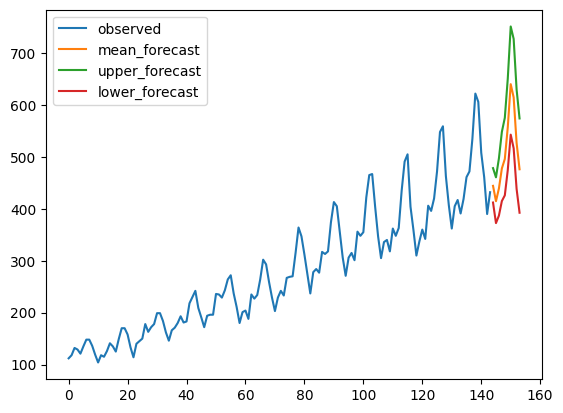

In [24]:
df_plot_forecast = pd.DataFrame(model_fit.forecast(10,alpha = 0.1))
df_plot = pd.DataFrame({'observed':df['y'].dropna()})
df_plot = pd.concat([df_plot,df_plot_forecast])
df_plot.reset_index(drop=True,inplace=True)

df_plot.plot()
plt.show()